<a href="https://colab.research.google.com/github/sanjaygupta17/machine-learning-projects/blob/main/2_K_Nearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Whose my Neighbor? — k Nearest 

- Let’s say we have identified 2 categories in our dataset — say “Red Category 1” and “Green Category 2” as shown below.

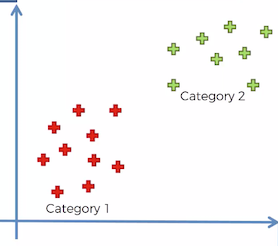

- Now let’s say we add a new data point in our dataset as shown below. So the question is — does it belong to “Red Category 1” or “Green Category 2”. How do we classify this new data point?


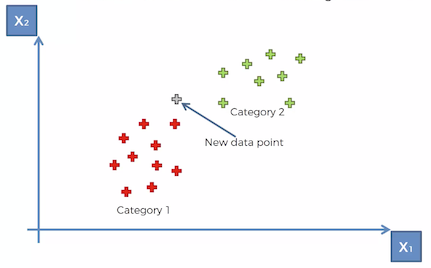

So this is where the k Nearest Neighbor (kNN) algorithm will come in to assist us. It’s a very simple algorithm.

- First we have to decide on the number of k neighbors — the most common or default value for k is 5.
- Next, we need to find the 5 nearest neighbors to this new data point based on Euclidean distance or Manhattan distance or any other. In layman’s terms, we have to find the 5 data points that are closest to this new data point. So based on the Euclidean distance, we have circled the 5 points that are closest to the new data point as shown below.

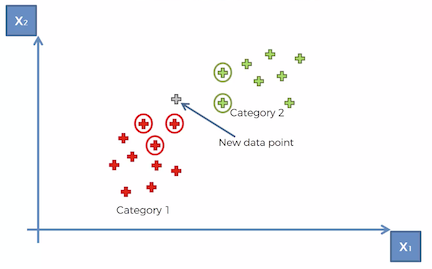

- Hence we have successfully classified the new data point using k Nearest Neighbor (kNN) classification algorithm.

Now let’s get our hands dirty and implement a project using the kNN algorithm.



In [ ]:
# Step 1 - Load Data
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/M. Tech. (1)/iphone_purchase_records.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 3].values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2 - Convert Gender to number
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

# Optional - if you want to convert X to float data type
import numpy as np
X = np.vstack(X[:, :]).astype(np.float)

In [ ]:
# Step 3 - Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Step 4 - Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Step 5 - Fit KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# metric = minkowski and p=2 is Euclidean Distance
# metric = minkowski and p=1 is Manhattan Distance
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:

# Step 5 - Make Prediction
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
# Step 7 - Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[64  4]
 [ 3 29]]
Accuracy score: 0.93
Precision score: 0.8787878787878788
Recall score: 0.90625
